In [1]:
import numpy as np
import matplotlib.pylab as plt
import sgd
from model import EmbeddingModel


In [2]:
vocabulary, titles, texts = sgd.scan_text('posts_1.csv', 5)

In [3]:
len(titles)

406

In [4]:
#stratify sample on validation and train set
ratio = 0.8
middle = int(len(titles) * ratio)
train_titles, val_titles = titles[:middle], titles[middle:]
train_texts, val_texts = texts[:middle], texts[middle:]

In [5]:
middle

324

In [6]:
[list(vocabulary.keys())[list(vocabulary.values())[idx]] for idx in train_titles[6]]

['мобильный',
 'аудитория',
 'сервис',
 'google',
 'UNKNOWN',
 'россия',
 'расти',
 'UNKNOWN',
 'фон',
 'противоречивый',
 'репутация',
 'компания']

In [7]:
len(list(vocabulary.keys())[list(vocabulary.values())[14]])

4

In [8]:
val_titles = [title for title, text in zip(val_titles, val_texts) if len(text) != 0 and len(title) != 0]
val_texts = [text for title, text in zip(val_titles, val_texts) if len(text) != 0 and len(title) != 0]

In [9]:
train_titles = [title for title, text in zip(train_titles, train_texts) if len(text) != 0 and len(title) != 0]
train_texts = [text for title, text in zip(train_titles, train_texts) if len(text) != 0 and len(title) != 0]

In [13]:
model = EmbeddingModel(vocabulary)
model.train(train_titles, train_texts, val_titles, val_texts, number_of_epoch = 50)



In [11]:
model.mtx_embed

array([[ 2.3724023e-02, -9.3718395e-03, -5.6829727e-03, ...,
         1.4917006e-02,  2.0959618e-02,  3.4380004e-02],
       [ 4.7361003e-03, -4.5549586e-02, -1.3913586e-02, ...,
         2.4324914e-02,  4.3607909e-02,  2.6184542e-02],
       [ 4.5782403e-04, -4.6831474e-02, -6.5760516e-02, ...,
         1.7900661e-02,  5.6263950e-02,  3.8576359e-03],
       ...,
       [-1.2076205e-02, -1.8135679e-03, -1.1506269e-02, ...,
        -1.5571518e-02, -1.3034259e-02, -6.4125871e-03],
       [-1.3134756e-02, -1.3764326e-02,  1.8810425e-02, ...,
        -1.5767739e-03, -8.5421856e-03, -4.6074204e-03],
       [ 1.0495244e-02, -1.2027610e-02, -3.0087056e-06, ...,
         3.7417992e-03,  1.4701380e-02,  7.7225342e-03]], dtype=float32)

In [14]:
model.losses

[1.0585315767675638,
 0.9923204228980467,
 0.9953297395259142,
 0.9983217543922365,
 1.0052594812586904,
 0.9829254103824496,
 0.9851092989556491,
 1.0061801690608263,
 0.9854039512574673,
 0.9943605456501245,
 1.031725101172924,
 1.0270536057651043,
 0.9934311583638191,
 0.9561423271661624,
 0.9946370385587215,
 0.9400873490376398,
 0.8838038966059685,
 0.6785806640982628,
 0.8942383788526058,
 0.9975724592804909,
 0.9721913710236549,
 0.8568916358053684,
 0.7859026566147804,
 1.0809618383646011,
 0.46540243923664093,
 1.086425706744194,
 1.0849311351776123,
 0.9304886609315872,
 0.7720838114619255,
 1.0481813102960587,
 0.8277293378487229,
 1.1992924511432648,
 0.7286091968417168,
 1.0405507534742355,
 1.2191398590803146,
 0.6706133708357811,
 0.7141999751329422,
 0.7621834599412978,
 0.6242070347070694,
 0.8261089324951172,
 0.5716934651136398,
 0.857706643640995,
 0.5955388098955154,
 0.6001397371292114,
 1.0031149685382843,
 0.8797220289707184,
 0,
 0.5386901497840881,
 0.98570209

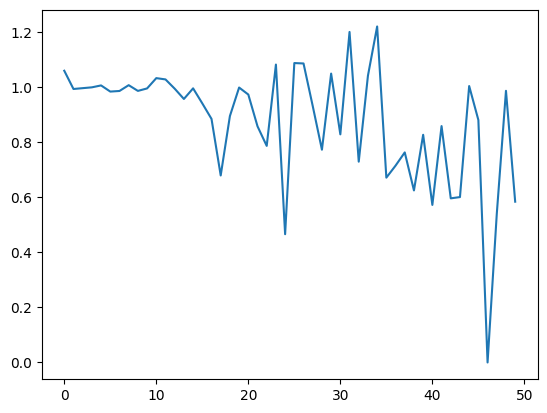

In [18]:
plt.plot(model.losses)
plt.show()

In [19]:
model.calculate_metric(val_titles, val_texts)

0.012195121951219513

In [20]:
val_titles[9]

[5309, 2027, 3230, 60, 0]

In [21]:
mtx_embed = model.mtx_embed
#norms = mtx_embed.sum(axis=1, keepdims=True)
#mtx_embed = mtx_embed/norms
#mtx_embed = mtx_embed[1:]

In [22]:
res = np.dot(mtx_embed, mtx_embed.T)

In [24]:
res_mtx = np.argsort(res, axis=1)

In [25]:
res_mtx[0][-4:]

array([ 376, 1622, 2545, 1213])

In [26]:
for idx, row in enumerate(res_mtx[:10]):
    print("The word: " + list(vocabulary.keys())[list(vocabulary.values())[idx]])
    print("similar words: " + " ".join([list(vocabulary.keys())[list(vocabulary.values())[item]] for item in row[-4:]]))

The word: UNKNOWN
similar words: часть читатель описание получаться
The word: обнаружение
similar words: атака active directory обнаружение
The word: атака
similar words: обнаружение directory проектный атака
The word: active
similar words: релиз бесплатный автоматически доступный
The word: directory
similar words: directory помочь бесплатный доступный
The word: помощь
similar words: рассмотреть содержать false true
The word: azure
similar words: сервис инфраструктура бесплатный доступный
The word: следующий
similar words: рассмотреть содержать выполняться false
The word: год
similar words: течение стоимость компания год
The word: будет
similar words: миллиард год представитель компания
